<a href="https://colab.research.google.com/github/hendra044444/UAS-hendra-tafonao/blob/main/UAS_hendra_tafonao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
!pip install scikit-fuzzy



Kelayakan Kredit: 7.69


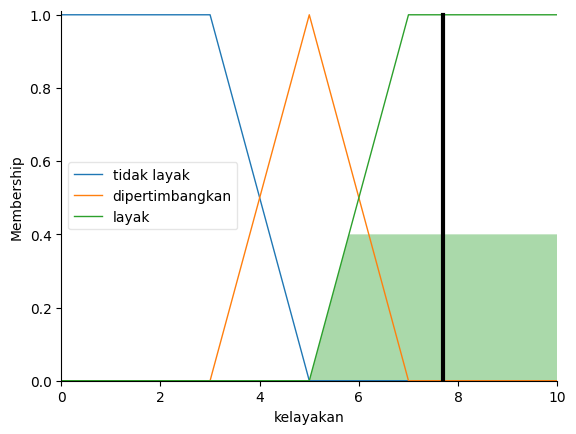

In [ ]:

# Definisi Variabel Fuzzy
pendapatan = ctrl.Antecedent(np.arange(0, 21, 1), 'pendapatan')  # juta rupiah
utang = ctrl.Antecedent(np.arange(0, 21, 1), 'utang')  # juta rupiah
riwayat = ctrl.Antecedent(np.arange(0, 11, 1), 'riwayat')  # skala 0-10
kelayakan = ctrl.Consequent(np.arange(0, 11, 1), 'kelayakan')  # skala 0-10

# Membership Functions untuk Pendapatan
pendapatan['rendah'] = fuzz.trapmf(pendapatan.universe, [0, 0, 5, 10])
pendapatan['sedang'] = fuzz.trimf(pendapatan.universe, [5, 10, 15])
pendapatan['tinggi'] = fuzz.trapmf(pendapatan.universe, [10, 15, 20, 20])

# Membership Functions untuk Utang
utang['rendah'] = fuzz.trapmf(utang.universe, [0, 0, 5, 10])
utang['sedang'] = fuzz.trimf(utang.universe, [5, 10, 15])
utang['tinggi'] = fuzz.trapmf(utang.universe, [10, 15, 20, 20])

# Membership Functions untuk Riwayat Kredit
riwayat['buruk'] = fuzz.trapmf(riwayat.universe, [0, 0, 2, 5])
riwayat['sedang'] = fuzz.trimf(riwayat.universe, [2, 5, 8])
riwayat['baik'] = fuzz.trapmf(riwayat.universe, [5, 8, 10, 10])

# Membership Functions untuk Kelayakan Kredit
kelayakan['tidak layak'] = fuzz.trapmf(kelayakan.universe, [0, 0, 3, 5])
kelayakan['dipertimbangkan'] = fuzz.trimf(kelayakan.universe, [3, 5, 7])
kelayakan['layak'] = fuzz.trapmf(kelayakan.universe, [5, 7, 10, 10])

# Definisi Aturan Fuzzy
rule1 = ctrl.Rule(
    pendapatan['rendah'] & utang['tinggi'] & riwayat['buruk'],
    kelayakan['tidak layak']
)
rule2 = ctrl.Rule(
    pendapatan['sedang'] & utang['sedang'] & riwayat['sedang'],
    kelayakan['dipertimbangkan']
)
rule3 = ctrl.Rule(
    pendapatan['tinggi'] & utang['rendah'] & riwayat['baik'],
    kelayakan['layak']
)
rule4 = ctrl.Rule(
    pendapatan['tinggi'] & utang['sedang'] & riwayat['baik'],
    kelayakan['layak']
)
rule5 = ctrl.Rule(
    pendapatan['rendah'] & utang['rendah'] & riwayat['baik'],
    kelayakan['dipertimbangkan']
)

# Sistem Kontrol
credit_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
credit_sim = ctrl.ControlSystemSimulation(credit_ctrl)

# Input Data
credit_sim.input['pendapatan'] = 12  # Pendapatan dalam juta
credit_sim.input['utang'] = 5       # Utang dalam juta
credit_sim.input['riwayat'] = 8     # Riwayat skala 0-10

# Proses dan Output
credit_sim.compute()
print(f"Kelayakan Kredit: {credit_sim.output['kelayakan']:.2f}")

# Visualisasi
kelayakan.view(sim=credit_sim)
